In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib_venn import venn2


In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 5000)

# SMM4H21

In [3]:
smm4h21_train = pd.read_csv('../../data/interim/smm4h21/train_pure.csv')
smm4h21_test = pd.read_csv('../../data/interim/smm4h21/test.csv')

In [4]:
smm4h21_train.shape, smm4h21_test.shape

((1039, 5), (287, 5))

In [5]:
smm4h21_test

,term,text,code,STR,SNMS
0,nerves,@crohnietweets i found the humira to fix all m...,10029177,Nerve damage,"['Nerve injury', 'Nerve injury', 'Nerve injury..."
1,muscle spasms,@crohnietweets i found the humira to fix all m...,10028334,Muscle spasms,"['Spasm', 'Spasm, NOS', 'Muscle spasm', 'Muscl..."
2,gaining,@jennabear32819 have to go to a doc now to see...,10047896,Weight gain,"['Weight gain', 'Weight gain', 'Increased body..."
3,gain like 50 pounds,@jennabear32819 have to go to a doc now to see...,10047896,Weight gain,"['Weight gain', 'Weight gain', 'Increased body..."
4,frontal headache,06.30 day 14 Rivaroxaban diary. Thanks to para...,10019211,Headache,"['Headache', 'Headache', 'Headache', 'Headache..."
...,...,...,...,...,...
282,withdrawal,"@Ta3fox Yeah, Pristiq is a different formulati...",10073281,Withdrawal symptom,"['Withdrawal symptom', 'Withdrawal complaint',..."
283,allergic,guess i'm allergic to cipro...,10001720,Allergic reaction to antibiotics,[]
284,holes in my head,"eat my trazodone then go to bed, wake up in th...",10027374,Mental impairment,"['Mental handicap', 'Mental handicap', 'Mental..."
285,depression.,a big ol' fuck you to my doctor for not tellin...,10012378,Depression,"['Depression', 'Depression, NOS', 'Depression ..."


In [6]:
smm4h21_train['term'].apply(lambda x: len(x.split())).sum(), \
smm4h21_test['term'].apply(lambda x: len(x.split())).sum(), \

(2457, 545)

In [7]:
smm4h21_train = smm4h21_train.dropna(axis=1)
smm4h21_train['code'] = smm4h21_train['code'].astype("int64")

smm4h21_test = smm4h21_test.dropna(axis=1)
smm4h21_test['code'] = smm4h21_test['code'].astype("int64")


In [8]:
smm4h21_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   term    1039 non-null   object
 1   text    1039 non-null   object
 2   code    1039 non-null   int64 
 3   STR     1039 non-null   object
 4   SNMS    1039 non-null   object
dtypes: int64(1), object(4)
memory usage: 40.7+ KB


In [9]:
smm4h21_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   term    287 non-null    object
 1   text    287 non-null    object
 2   code    287 non-null    int64 
 3   STR     287 non-null    object
 4   SNMS    287 non-null    object
dtypes: int64(1), object(4)
memory usage: 11.3+ KB


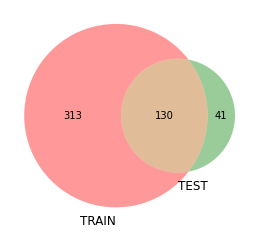

In [10]:
train_labels = set(smm4h21_train['code'].unique())
test_labels = set(smm4h21_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [11]:
smm4h21_train['code'] = smm4h21_train['code'].astype("category")
smm4h21_train.describe(include='all')

,term,text,code,STR,SNMS
count,1039,1039,1039,1039,1039
unique,973,830,443,443,290
top,sleep,RT @ellus_cooper: @UCLAibd even w/ Humira: ab ...,10016370,Feeling unwell,[]
freq,6,6,32,32,211


In [12]:
smm4h21_test['code'] = smm4h21_test['code'].astype("category")
smm4h21_test.describe(include='all')

,term,text,code,STR,SNMS
count,287,287,287,287,287
unique,244,257,171,171,120
top,sick,cant cope coming off #venlafaxine feel like iv...,10047896,Weight gain,[]
freq,8,5,11,11,59


In [13]:
train, test = smm4h21_train, smm4h21_test
dataset = pd.concat([train, test])

median_synonims = dataset[['code', 'SNMS']]
median_synonims['SNMS'] = median_synonims['SNMS'].apply(lambda x: len(eval(x)))
median_synonims_num = median_synonims.groupby('code').agg('mean').median()

median_synonims_num['SNMS'], \
train['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape, \
test['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape

/home/kaigorodov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(8.0, (2573,), (1077,))

### SMM4H17

In [14]:
smm4h17_train = pd.read_csv('../../data/interim/smm4h17/train_pure.csv')
smm4h17_test = pd.read_csv('../../data/interim/smm4h17/test.csv')

smm4h17_train['code'] = smm4h17_train['code'].apply(lambda x: int(x) if str(x).isdigit() else None)
print(smm4h17_train[smm4h17_train['code'].isna()].shape)
smm4h17_train = smm4h17_train[~smm4h17_train['code'].isna()]

smm4h17_test['code'] = smm4h17_test['code'].apply(lambda x: int(x) if str(x).isdigit() else None)
print(smm4h17_test[smm4h17_test['code'].isna()].shape)
smm4h17_test = smm4h17_test[~smm4h17_test['code'].isna()]
smm4h17_train

(0, 4)
(0, 4)


,term,code,STR,SNMS
0,addict,10013663,Drug dependence,"['Drug dependence', 'Drug dependence', 'Drug d..."
1,reaction allergic,10020751,Hypersensitivity,"['Hypersensitivity', 'Hypersensitivity', 'Hype..."
2,pre-cutting,10022524,Intentional self-injury,[]
3,withdrawals,10048010,Withdrawal syndrome,[]
4,delirious,10012218,Delirium,"['Delirium', 'Delirium', 'Delirium', 'Delirium..."
...,...,...,...,...
2769,dreams night movie your in eventful,10000125,Abnormal dreams,"['Dream disorder', 'Abnormal dreams', 'Abnorma..."
2770,lot me a cry made,10011469,Crying,"['Crying', 'Crying', 'Crying', 'Crying', 'Cryi..."
2771,from sleep 3hrs of only,10022437,Insomnia,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn..."
2772,like sleeping feel,10041349,Somnolence,"['Somnolence', 'Somnolence', 'Somnolence', 'So..."


In [15]:
smm4h17_train.shape, smm4h17_test.shape

((2774, 4), (2499, 4))

In [16]:
smm4h17_test

,term,code,STR,SNMS
0,sleepier,10041349,Somnolence,"['Somnolence', 'Somnolence', 'Somnolence', 'So..."
1,dreamt colors,10000125,Abnormal dreams,"['Dream disorder', 'Abnormal dreams', 'Abnorma..."
2,zombie,10016322,Feeling abnormal,"['Feeling abnormal', 'Abnormal feeling', 'Abno..."
3,headache,10019211,Headache,"['Headache', 'Headache', 'Headache', 'Headache..."
4,crazy,10061920,Psychotic disorder,"['Psychotic disorder, NOS', 'Psychotic disorde..."
...,...,...,...,...
2494,sleptwalk,10041347,Somnambulism,"['Somnambulism', 'Somnambulism', 'Somnambulism..."
2495,fatigue,10016256,Fatigue,"['Fatigue', 'Fatigue', 'Fatigue', 'Tiredness',..."
2496,headache,10019211,Headache,"['Headache', 'Headache', 'Headache', 'Headache..."
2497,out of it,10041349,Somnolence,"['Somnolence', 'Somnolence', 'Somnolence', 'So..."


In [17]:
smm4h17_train['term'].apply(lambda x: len(x.split())).sum(), \
smm4h17_test['term'].apply(lambda x: len(x.split())).sum(), \
# (smm4h17_train['start'] - smm4h17_train['end']).mean(), \
# (smm4h17_train['start'] - smm4h17_train['end']).min(), \
# (smm4h17_train['start'] - smm4h17_train['end']).max()

(8360, 5319)

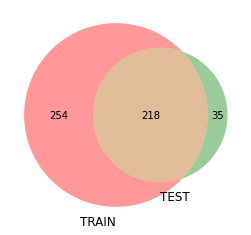

In [18]:
train_labels = set(smm4h17_train['code'].unique())
test_labels = set(smm4h17_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [19]:
smm4h17_train['code'] = smm4h21_train['code'].astype("category")
smm4h17_train.describe(include='all')

,term,code,STR,SNMS
count,2774,1039,2774,2774
unique,2764,443,472,418
top,throat,10016370,Insomnia,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn..."
freq,2,32,339,339


In [20]:
smm4h17_test['code'] = smm4h17_test['code'].astype("category")
smm4h17_test.describe(include='all')

,term,code,STR,SNMS
count,2499,2499,2499,2499
unique,1194,253,253,228
top,withdrawal,10022437,Insomnia,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn..."
freq,113,330,330,330


In [21]:
train, test = smm4h17_train, smm4h17_test
dataset = pd.concat([train, test])

median_synonims = dataset[['code', 'SNMS']]
median_synonims['SNMS'] = median_synonims['SNMS'].apply(lambda x: len(eval(x)))
median_synonims_num = median_synonims.groupby('code').agg('mean').median()

median_synonims_num['SNMS'], \
train['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape, \
test['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape

/home/kaigorodov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(13.0, (3900,), (2244,))

# Compare SMM4h 17 and 21

In [22]:
smm4h_train = pd.concat([smm4h21_train, smm4h17_train], axis=0)
smm4h_test = pd.concat([smm4h21_test, smm4h17_test], axis=0)

smm4h_train.shape, smm4h_test.shape

((3813, 5), (2786, 5))

In [23]:
smm4h_train

,term,text,code,STR,SNMS
0,neck pain in,05.00 day 17 Rivaroxaban diary. Woken up by pa...,10028836,Neck pain,"['Neck pain', 'Neck pain NOS', 'Cervicalgia', ..."
1,to go sleep can't back,@_chanabeth_ @laceykaybee i didn't stay long. ...,10011001,Corneal desquamation,[]
2,nosleep,i guess this is what i get for doubling my vyv...,10041001,Sleep loss,[]
3,me out knocks,evening dose of lithium and olanzapine really ...,10041014,Sleepiness,"['Drowsiness', 'Drowsiness', 'Sleepiness', 'Sl..."
4,hungry,@dopamine_diva q makes me hungry. olanzapine m...,10020466,Hunger,"['Hunger', 'Hunger, NOS', 'Feeding drive', 'Fo..."
...,...,...,...,...,...
2769,dreams night movie your in eventful,NaN,NaN,Abnormal dreams,"['Dream disorder', 'Abnormal dreams', 'Abnorma..."
2770,lot me a cry made,NaN,NaN,Crying,"['Crying', 'Crying', 'Crying', 'Crying', 'Cryi..."
2771,from sleep 3hrs of only,NaN,NaN,Insomnia,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn..."
2772,like sleeping feel,NaN,NaN,Somnolence,"['Somnolence', 'Somnolence', 'Somnolence', 'So..."


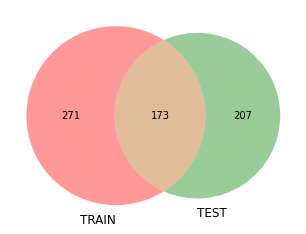

In [24]:
train_labels = set(smm4h_train['code'].unique())
test_labels = set(smm4h_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [25]:
smm4h_train['code'] = smm4h_train['code'].astype("category")
smm4h_train.describe(include='all')

,term,text,code,STR,SNMS
count,3813,1039,2078,3813,3813
unique,3025,830,443,799,539
top,sleep,RT @ellus_cooper: @UCLAibd even w/ Humira: ab ...,10016370,Insomnia,[]
freq,7,6,64,351,394


# CADEC

In [26]:
cadec_train = pd.read_csv('../../data/interim/cadec/train_pure.csv')
cadec_test = pd.read_csv('../../data/interim/cadec/test.csv')
cadec_train

,term,sent,text,code,STR,SNMS
0,neuropathy toe,"2 years with no problems, then toe neuropathy ...","2 years with no problems, then toe neuropathy ...",10034610,Peripheral neuropathy NOS,"['Peripheral nerve disease', 'Peripheral neuro..."
1,in legs pain severe,"I have started physical therapy, massage thera...","After 1 year on Lipitor, I experienced severe ...",10033371,Pain,"['Pain', 'Pain', 'Pain', 'Pain', 'Pain', 'Pain..."
2,muscle left in elbow pain,"Muscle pain in left elbow, pain in feet.","Muscle pain in left elbow, pain in feet.<SENT>...",10033424,Pain in elbow,"['Pain in elbow', 'Elbow pain', 'Pain in elbow..."
3,shoulders pain in extreme,VERY SCAREY DRUG.,EXTREME PAIN IN NECK AND SHOULDERS FOR THREE W...,10033371,Pain,"['Pain', 'Pain', 'Pain', 'Pain', 'Pain', 'Pain..."
4,nausea severe,severe nausea dizziness terrible stomach pain.,severe nausea dizziness terrible stomach pain.,10028813,Nausea,"['Nausea', 'Nausea', 'Nausea', 'Nausea', 'Naus..."
...,...,...,...,...,...,...
1986,in legs burning,The side effects are very distracting.,Mostly Tingling/burning in arms and legs and b...,10033386,Pain burning,"['Burning pain', 'Burning pain', 'Burning pain..."
1987,muscle general soreness,I take several meds for rheumatoid arthritis a...,fluids pooling in my lower extremeties - espec...,10016766,Flatulence,"['Flatulence', 'Flatulence', 'Flatulence', 'Fl..."
1988,inflamation painful joints of,I significanlty lowered my chol by using 10mg ...,"serious hands & feet cramping, weakness, painf...",10003239,Arthralgia,"['Arthralgia', 'Arthralgia', 'Arthralgia', 'Ar..."
1989,ankle pain in,was a big lipitor fan before started on studie...,initially noticed twitching in thighs thought ...,10033379,Pain ankle,"['Ankle pain', 'Ankle pain', 'Arthralgia of an..."


In [27]:
cadec_train.shape, cadec_test.shape, 

((1991, 6), (881, 6))

In [28]:
cadec_train['term'].apply(lambda x: len(x.split())).sum(), \
cadec_test['term'].apply(lambda x: len(x.split())).sum(), \

(6451, 2242)

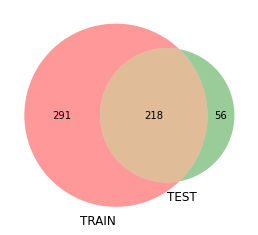

In [29]:
train_labels = set(cadec_train['code'].unique())
test_labels = set(cadec_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [30]:
cadec_train['code'] = cadec_train['code'].astype("category")
cadec_train.describe(include='all')

,term,sent,text,code,STR,SNMS
count,1991,1991,1991,1991,1991,1991
unique,1977,1982,846,509,509,419
top,tendonitis,.,I had been taking Lipitor 10mg for 2 years.<SE...,10033371,Pain,"['Pain', 'Pain', 'Pain', 'Pain', 'Pain', 'Pain..."
freq,2,6,14,144,144,144


In [31]:
cadec_test['code'] = cadec_test['code'].astype("category")
cadec_test.describe(include='all')

,term,sent,text,code,STR,SNMS
count,881,881,881,881,881,881
unique,658,874,576,274,274,234
top,pain,.,I had been taking Lipitor 10mg for 2 years.<SE...,10033371,Pain,"['Pain', 'Pain', 'Pain', 'Pain', 'Pain', 'Pain..."
freq,25,4,8,70,70,70


In [32]:
train, test = cadec_train, cadec_test
dataset = pd.concat([train, test])

median_synonims = dataset[['code', 'SNMS']]
median_synonims['SNMS'] = median_synonims['SNMS'].apply(lambda x: len(eval(x)))
median_synonims_num = median_synonims.groupby('code').agg('mean').median()

median_synonims_num['SNMS'], \
train['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape, \
test['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape

/home/kaigorodov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(10.0, (3596,), (2204,))

# PsyTar

In [33]:
psytar_train = pd.read_csv('../../data/interim/psytar/train_pure.csv')
psytar_test = pd.read_csv('../../data/interim/psytar/test.csv')
psytar_train

,term,text,code,STR,SNMS
0,irritability,Irritability.<SENT>This is a great drug with m...,10022998.0,Irritability,"['Irritable mood', 'Fussiness', 'Irritability'..."
1,sex decrease drive in,No noticeable side effects until dosage was in...,10024419.0,Libido decreased,"['Decreased libido', 'Low libido', 'Reduced li..."
2,light-headed feeling,"Nausea, a light-headed feeling, and dizziness ...",10024490.0,Light-headed,"['Lightheadedness', 'Lightheadedness', 'Feels ..."
3,hurt the stomach all time,"Increased anxiety, SERIOUS constipation (for w...",10042112.0,Stomach pain,"['Stomach ache', 'Stomach ache', 'Belly ache',..."
4,fatigue,"Brain zaps, excessive yawning, fatigue, increa...",10016256.0,Fatigue,"['Fatigue', 'Fatigue', 'Fatigue', 'Tiredness',..."
...,...,...,...,...,...
2024,to enjoy b/c the too glass it wine champagne o...,"Moderate to severe dry mouth and dry eyes, occ...",10001598.0,Alcohol intolerance,"['Alcohol intolerance', 'Alcohol intolerance (..."
2025,horrible migraines,HOrrible migraines but i have had migraines si...,10027599.0,Migraine,"['Migraine (disorder)', 'Migraine (disorder)',..."
2026,to was worse starting get anxiety,"Insomnia, dizzy, anxiety, dry mouth, muscle ac...",10002855.0,Anxiety,"['Anxiety', 'Anxiety', 'Anxiety reaction', 'An..."
2027,anything to eat days unable the for significant 3,"Nausea, Blurred Vision, 3 to 5 hours sleep, Su...",10003025.0,Appetite impaired,"['Loss of appetite (finding)', 'Anorexia', 'An..."


In [34]:
psytar_train.shape, psytar_test.shape

((2029, 5), (798, 5))

In [35]:
psytar_train['term'].apply(lambda x: len(x.split())).sum(), \
psytar_test['term'].apply(lambda x: len(x.split())).sum(), \

(7130, 2218)

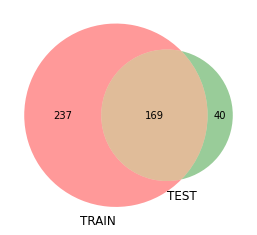

In [36]:
train_labels = set(psytar_train['code'].unique())
test_labels = set(psytar_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [37]:
psytar_train['code'] = psytar_train['code'].astype("category")
psytar_train.describe(include='all')

,term,text,code,STR,SNMS
count,2029,2029,2029.0,2029,2029
unique,2024,687,406.0,406,358
top,numbness emotional,"sweating,dizziness, severe dry mouth (coughing...",10028813.0,Nausea,[]
freq,2,21,65.0,65,179


In [38]:
psytar_test['code'] = psytar_test['code'].astype("category")
psytar_test.describe(include='all')

,term,text,code,STR,SNMS
count,798,798,798.0,798,798
unique,587,455,209.0,209,182
top,weight gain,"achiness, tiredness, restlessness, blurry visi...",10022437.0,Insomnia,[]
freq,22,6,41.0,41,55


In [39]:
train, test = psytar_train, psytar_test
dataset = pd.concat([train, test])

median_synonims = dataset[['code', 'SNMS']]
median_synonims['SNMS'] = median_synonims['SNMS'].apply(lambda x: len(eval(x)))
median_synonims_num = median_synonims.groupby('code').agg('mean').median()

median_synonims_num['SNMS'], \
train['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape, \
test['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape

/home/kaigorodov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(8.0, (3078,), (1701,))

# Compare TRAIN SETS

<AxesSubplot:xlabel='code', ylabel='Count'>

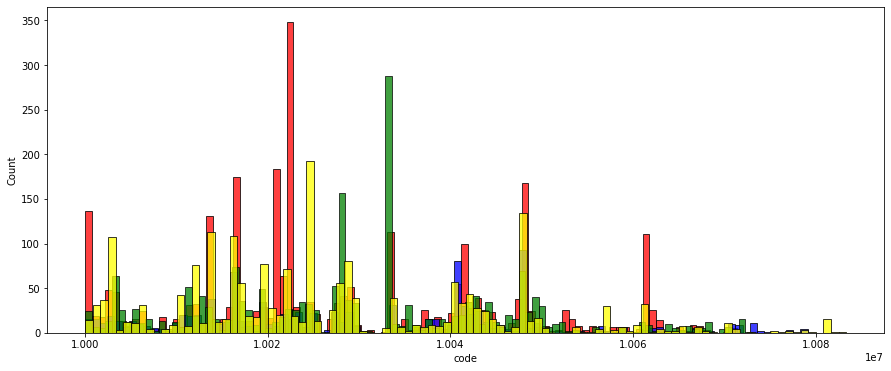

In [40]:
# smm4h17_train
# smm4h21_train
# cadec_train
# psytar_train

smm4h17_train = pd.read_csv('../../data/interim/smm4h17/train_pure.csv').dropna()
smm4h21_train = pd.read_csv('../../data/interim/smm4h21/train_pure.csv').dropna()
cadec_train = pd.read_csv('../../data/interim/cadec/train_pure.csv').dropna()
psytar_train = pd.read_csv('../../data/interim/psytar/train_pure.csv').dropna()

bins = 100

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h17_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h21_train['code'], bins=bins, color='blue')
sns.histplot(data=cadec_train['code'], bins=bins, color='green')
sns.histplot(data=psytar_train['code'], bins=bins, color='yellow')

# Compare TEST SETS

<AxesSubplot:xlabel='code', ylabel='Count'>

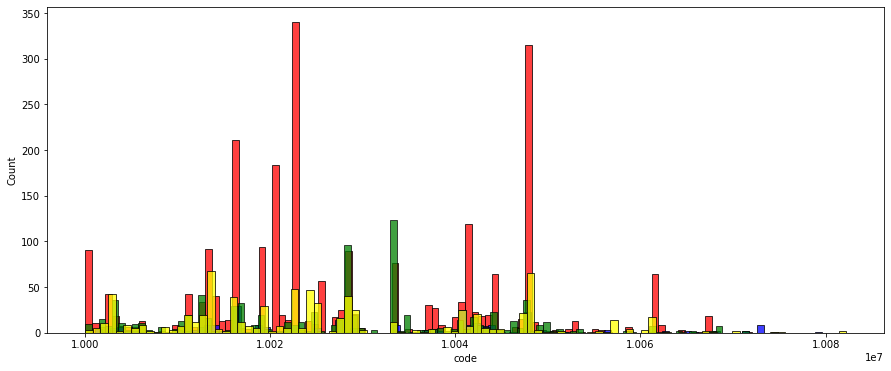

In [41]:
train_labels = set(psytar_train['code'].unique())
test_labels = set(psytar_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

bins = 100

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h17_test['code'], bins=bins, color='red')
sns.histplot(data=smm4h21_test['code'], bins=bins, color='blue')
sns.histplot(data=cadec_test['code'], bins=bins, color='green')
sns.histplot(data=psytar_test['code'], bins=bins, color='yellow')

# COMBINED

In [42]:
! pwd

/home/kaigorodov/myprojects/MedConcNorm/notebooks/work_with_raw_data


In [44]:
smm4h17_train = pd.read_csv('../../data/interim/smm4h17/train_pure.csv').dropna()
smm4h21_train = pd.read_csv('../../data/interim/smm4h21/train_pure.csv').dropna()
cadec_train = pd.read_csv('../../data/interim/cadec/train_pure.csv').dropna()
psytar_train = pd.read_csv('../../data/interim/psytar/train_pure.csv').dropna()

smm4h17_test = pd.read_csv('../../data/interim/smm4h17/test.csv').dropna()
smm4h21_test = pd.read_csv('../../data/interim/smm4h21/test.csv').dropna()
cadec_test= pd.read_csv('../../data/interim/cadec/test.csv').dropna()
psytar_test = pd.read_csv('../../data/interim/psytar/test.csv').dropna()


train = pd.concat([
    smm4h17_train, smm4h21_train, cadec_train, psytar_train
])
test = pd.concat([
    smm4h17_test, smm4h21_test, cadec_test, psytar_test
])

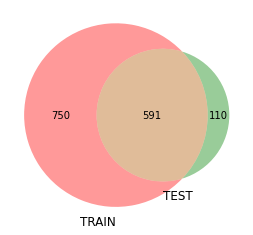

In [45]:
train_labels = set(train['code'].unique())
test_labels = set(test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

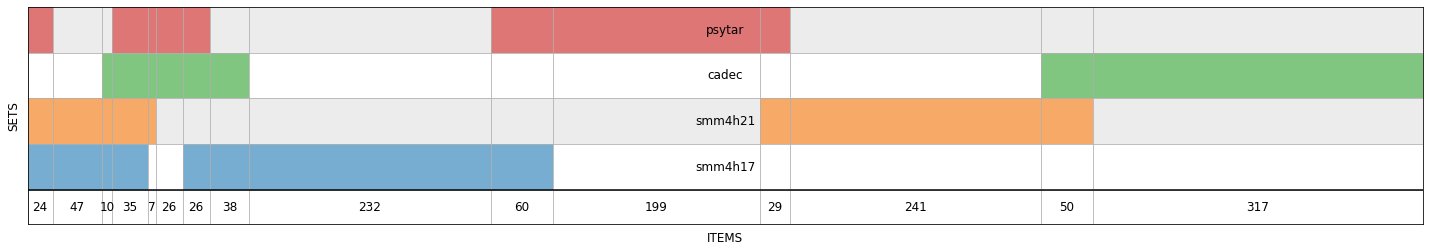

In [56]:
from supervenn import supervenn
import matplotlib.pyplot as plt
sets = [set(smm4h17_train['code'].unique()), set(smm4h21_train['code'].unique()), set(cadec_train['code'].unique()), set(psytar_train['code'].unique())]

plt.figure(figsize=(25, 4))
supervenn(sets,('smm4h17', 'smm4h21', 'cadec', 'psytar'), side_plots=False)

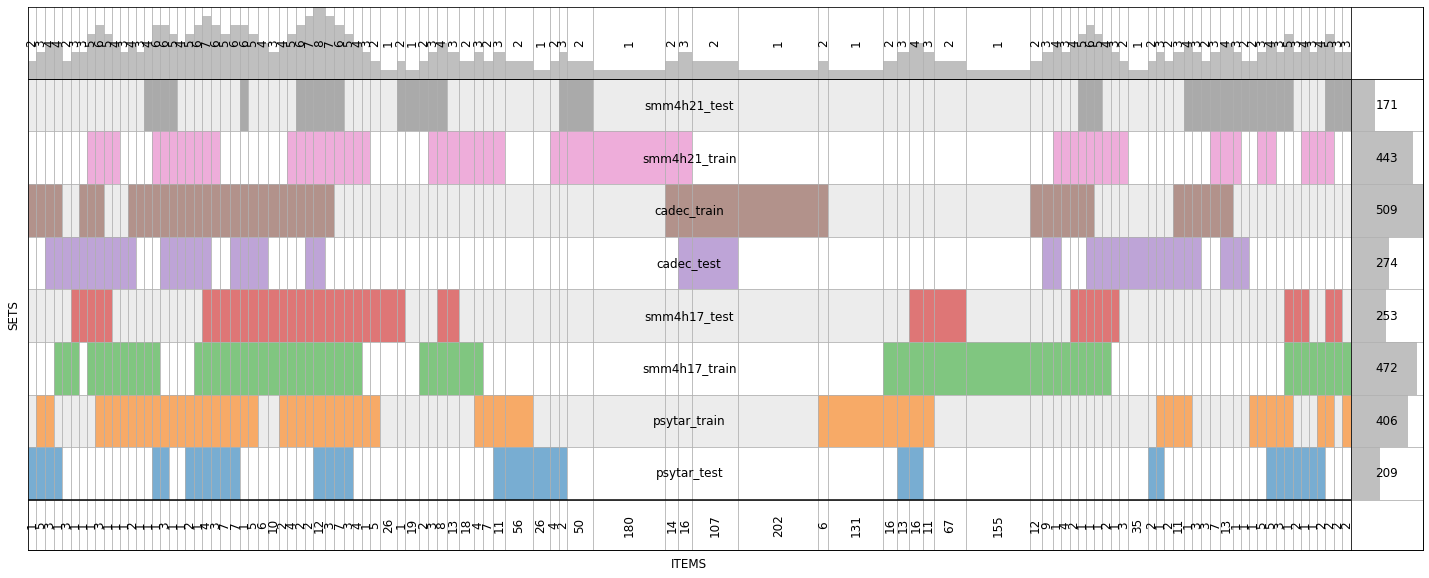

In [62]:
from supervenn import supervenn
import matplotlib.pyplot as plt
sets_train = [set(smm4h17_train['code'].unique()), 
        set(smm4h21_train['code'].unique()), 
        set(cadec_train['code'].unique()), 
        set(psytar_train['code'].unique())]
sets_test = [set(smm4h17_test['code'].unique()), 
        set(smm4h21_test['code'].unique()), 
        set(cadec_test['code'].unique()), 
        set(psytar_test['code'].unique())]
sets = sets_train + sets_test

names = (
    'smm4h17_train', 'smm4h21_train', 'cadec_train', 'psytar_train',
    'smm4h17_test', 'smm4h21_test', 'cadec_test', 'psytar_test'
)

plt.figure(figsize=(25, 10))
supervenn(sets, 
          names, 
          widths_minmax_ratio=0.1,
          sets_ordering='minimize gaps', 
          rotate_col_annotations=True, 
          col_annotations_area_height=1.2)

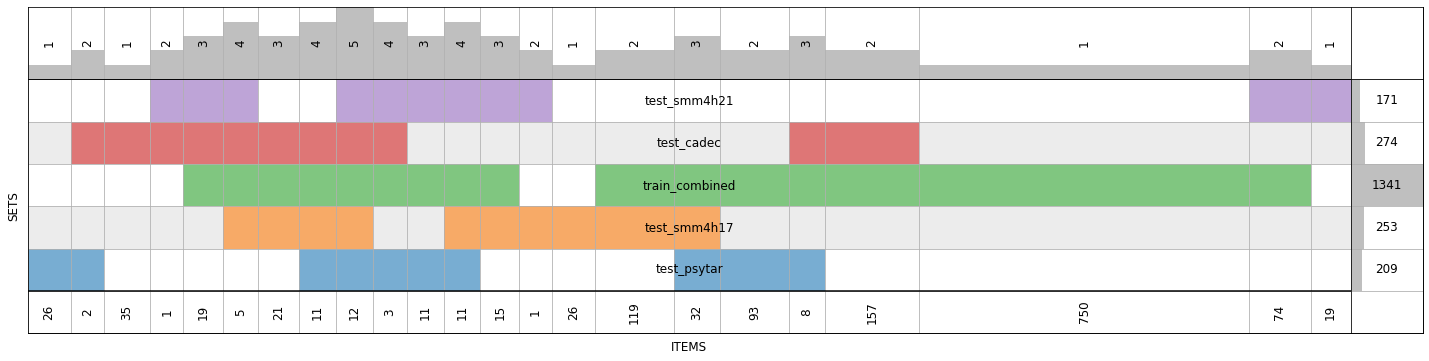

In [90]:

sets_train = set(pd.concat([smm4h17_train, smm4h21_train, cadec_train, psytar_train])['code'].unique()) 

sets_test = [set(smm4h17_test['code'].unique()), 
        set(smm4h21_test['code'].unique()), 
        set(cadec_test['code'].unique()), 
        set(psytar_test['code'].unique())]
sets = [sets_train] + sets_test

names = [
    'train_combined', 'test_smm4h17', 'test_smm4h21', 'test_cadec', 'test_psytar'
]

plt.figure(figsize=(25, 6))
supervenn(sets, 
          names, 
          widths_minmax_ratio=0.1,
          sets_ordering='minimize gaps', 
          rotate_col_annotations=True, 
          col_annotations_area_height=1.2)

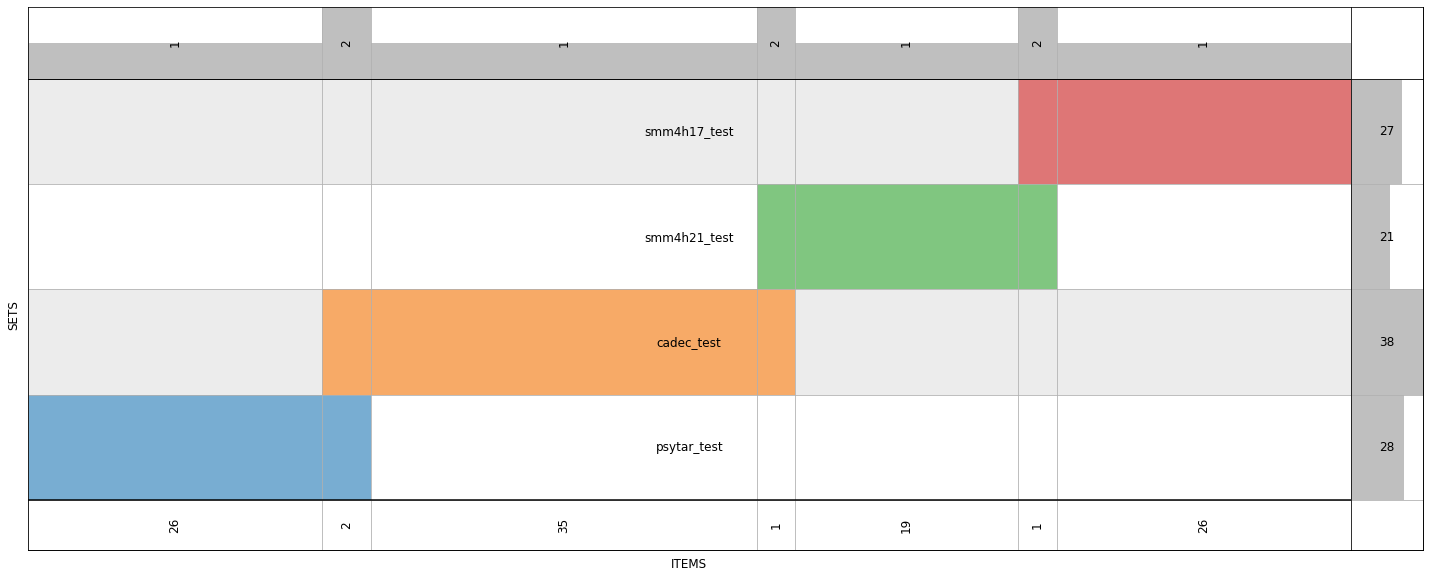

In [84]:

sets_train = set(pd.concat([smm4h17_train, smm4h21_train, cadec_train, psytar_train])['code'].unique()) 

sets_test = [set(smm4h17_test['code'].unique()), 
        set(smm4h21_test['code'].unique()), 
        set(cadec_test['code'].unique()), 
        set(psytar_test['code'].unique())]
sets = [test - sets_train for test in sets_test]

names = (
    'smm4h17_test', 'smm4h21_test', 'cadec_test', 'psytar_test'
)

plt.figure(figsize=(25, 10))
supervenn(sets, 
          names, 
          widths_minmax_ratio=0.1,
          sets_ordering='minimize gaps', 
          rotate_col_annotations=True, 
          col_annotations_area_height=1.2)

In [83]:
{1, 2} - {2, 3}

{1}